# Hate Speech Classification

Hate speech is defined by the Cambridge Dictionary as "public speech that expresses hate or encourages violence towards a person or group based on something such as race, religion, sex, or sexual orientation".

Steps to classify hate speech
- Preprocess the text data
- Convert text to numerical tokens
- Build and Train ML
- Test the Model
- Save and use it later

Dataset: hate_speech_dataset

In [1]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-irup3tef
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-irup3tef
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.0.3-cp36-none-any.whl size=4420 sha256=269b1e559918c52d49de5da6695b76a5ae78f198c23e9ab436d128b328e518b4
  Stored in directory: /tmp/pip-ephem-wheel-cache-b6dmxmin/wheels/a8/18/22/90afa4bd43247fb9a75b710a4a3fcd94966c022ce9e3c7d0a6
Successfully built preprocess-kgptalkie


In [3]:
# !pip install spacy

In [67]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Dropout
from tensorflow.keras.layers import Conv1D, MaxPool1D, GlobalMaxPooling1D, MaxPooling1D

In [5]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import preprocess_kgptalkie as ps

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/hate_speech_dataset/master/data.csv', index_col = 0)
df.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [9]:
#0 - hate speech | 1 - offensive language | 2 - neither

In [10]:
df['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

In [11]:
vc = df['class'].value_counts()
index = list(vc.index)
count = min(vc.values)

In [13]:
count, index

(1430, [1, 2, 0])

In [21]:
df_bal = pd.DataFrame()
for i in index:
  temp = df[df['class']==i].sample(count)
  df_bal = df_bal.append(temp, ignore_index = True)

In [23]:
df = df_bal.copy()

In [24]:
df['class'].value_counts()

2    1430
1    1430
0    1430
Name: class, dtype: int64

### Preprocessing

In [26]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_rt(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [29]:
x = 'iiii llloooooovvvveeee_#@youuuuuuu'

In [30]:
get_clean(x)

'i love you'

In [31]:
df['tweet'] = df['tweet'].apply(lambda x: get_clean(x))

In [33]:
df.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,1,2,0,1,bitches be trying to squash all beef wen they ...
1,3,0,3,0,1,bout tht time where the hoes are gettin dicked...
2,3,0,3,0,1,ikickbabies girls favorite line go talk to yo ...
3,3,0,3,0,1,rahleefranklin this bitch got a body like trey...
4,3,0,3,0,1,the april fool fucking with them hoes marc wit...


### Text Tokenization

In [34]:
text = df['tweet'].tolist()

In [36]:
text[:2]

['bitches be trying to squash all beef wen they find out they pregnant some hoes dont give a fuck',
 'bout tht time where the hoes are gettin dicked down']

In [37]:
token = Tokenizer()
token.fit_on_texts(text)

In [39]:
# help(token)

In [41]:
len(token.word_counts)

11754

In [42]:
print(token.index_word)

{1: 'a', 2: 'i', 3: 'the', 4: 'you', 5: 'to', 6: 'is', 7: 'bitch', 8: 'and', 9: 'not', 10: 'that', 11: 'in', 12: 'of', 13: 'my', 14: 'it', 15: 'like', 16: 'on', 17: 'me', 18: 'be', 19: 'am', 20: 'for', 21: 'trash', 22: 'this', 23: 'do', 24: 'are', 25: 'your', 26: 'with', 27: 'bitches', 28: 'all', 29: 'they', 30: 'so', 31: 'hoes', 32: 'but', 33: 'ass', 34: 'fuck', 35: 'just', 36: 'have', 37: 'get', 38: 'if', 39: 'he', 40: 'up', 41: 'was', 42: 'pussy', 43: 'nigga', 44: 'faggot', 45: 'when', 46: 'no', 47: 'at', 48: 'these', 49: 'hoe', 50: 'out', 51: 'shit', 52: 'got', 53: 'white', 54: 'lol', 55: 'she', 56: 'can', 57: 'them', 58: 'some', 59: 'fucking', 60: 'about', 61: 'what', 62: 'will', 63: 'as', 64: 'niggas', 65: 'one', 66: 'her', 67: 'who', 68: 'or', 69: 'nigger', 70: 'know', 71: 'we', 72: 'people', 73: 'go', 74: 'youre', 75: 'now', 76: 'bird', 77: 'his', 78: 'would', 79: 'from', 80: 'how', 81: 'an', 82: 'why', 83: 'yellow', 84: 'love', 85: 'man', 86: 'hate', 87: 'see', 88: 'yankees', 

In [43]:
x = ['i love you']

In [44]:
token.texts_to_sequences(x)

[[2, 84, 4]]

In [45]:
vocab_size = len(token.word_counts) + 1

In [46]:
encoded_text = token.texts_to_sequences(text)

In [47]:
print(encoded_text)

[[27, 18, 279, 5, 2258, 28, 2259, 2260, 29, 243, 50, 29, 753, 58, 31, 161, 184, 1, 34], [204, 1663, 97, 145, 3, 31, 24, 450, 3844, 162], [3845, 178, 383, 451, 73, 191, 5, 94, 31], [3846, 22, 7, 52, 1, 830, 15, 2261, 2262], [3, 2263, 1109, 59, 26, 57, 31, 3847, 3848, 3849, 13, 43, 3850, 2, 86, 14, 136, 5, 18, 154, 85, 754], [485, 158, 48, 2264, 2, 1314, 219, 146, 29, 31, 2, 1314, 219, 2265, 48, 1315], [1110, 48, 27, 1316, 104, 1664, 11, 22, 3851], [38, 2, 41, 3852, 16, 1, 1665, 1666, 8, 2, 164, 93, 426, 263, 220, 2, 78, 426, 3853, 10, 49, 163, 427, 11, 10, 2266], [42, 185, 51, 32, 1, 1667, 4, 384, 192, 37, 3854, 3855, 68, 4, 175, 602], [2267, 3856, 238, 3857], [30, 75, 19, 9, 428, 52, 1, 452, 4, 28, 15, 120, 27, 3858, 82, 94, 233, 556, 141, 669], [1668, 147, 385, 67, 486, 165, 2268, 100, 29, 24, 2269, 3859, 1, 337, 179, 487, 51], [3860, 2, 23, 9, 453, 60, 27, 31, 18, 139, 14, 26, 29, 180, 670], [73, 755, 60, 14, 3861, 15, 3, 152, 7, 4, 24], [3, 3862, 239, 198, 1317], [7, 252, 1318, 1, 1

In [48]:
max_length = 120
X = pad_sequences(encoded_text, maxlen=max_length, padding = 'post')

In [49]:
print(X)

[[   27    18   279 ...     0     0     0]
 [  204  1663    97 ...     0     0     0]
 [ 3845   178   383 ...     0     0     0]
 ...
 [    2    19     9 ...     0     0     0]
 [ 2649    10    41 ...     0     0     0]
 [11754   374     4 ...     0     0     0]]


In [50]:
X.shape

(4290, 120)

### Model Building

In [65]:
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam

In [59]:
y = df['class']

In [60]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4285    0
4286    0
4287    0
4288    0
4289    0
Name: class, Length: 4290, dtype: int64

In [61]:
y = np_utils.to_categorical(df['class'])

In [62]:
print(y)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [64]:
X_train.shape, X_test.shape

((3432, 120), (858, 120))

In [68]:
vec_size = 300
model = Sequential()
model.add(Embedding(vocab_size, vec_size, input_length=max_length))

model.add(Conv1D(32, 2, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(3, activation='softmax'))

In [69]:
model.compile(optimizer=Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 2, validation_data=(X_test, y_test), shuffle = True)

Epoch 1/2
108/108 [==============================] - 4s 40ms/step - loss: 0.9623 - accuracy: 0.5650 - val_loss: 0.6392 - val_accuracy: 0.7890
Epoch 2/2
108/108 [==============================] - 4s 34ms/step - loss: 0.4862 - accuracy: 0.8260 - val_loss: 0.4952 - val_accuracy: 0.8205


### Model Testing

In [70]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [72]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f83f077e6a0>)

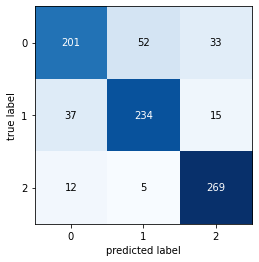

In [77]:
plot_confusion_matrix(confusion_matrix(np.argmax(y_test, axis=-1), y_pred))


In [78]:
print(classification_report(np.argmax(y_test, axis=-1), y_pred))

              precision    recall  f1-score   support

           0       0.80      0.70      0.75       286
           1       0.80      0.82      0.81       286
           2       0.85      0.94      0.89       286

    accuracy                           0.82       858
   macro avg       0.82      0.82      0.82       858
weighted avg       0.82      0.82      0.82       858



### Testing with Custom Data

In [84]:
x = 'hey bitch whass up'

In [85]:
def get_encoded(x):
  x = get_clean(x)
  x = token.texts_to_sequences([x])
  x = pad_sequences(x, maxlen=max_length, padding = 'post')
  return x

In [86]:
get_encoded(x)

array([[213,   7,  40,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0]], dtype=int32)

In [87]:
np.argmax(model.predict(get_encoded(x)), axis=-1)

array([1])

In [88]:
model.save('model_hate_speech.h5',)

In [89]:
import pickle

In [90]:
pickle.dump(token, open('token.pkl', 'wb'))